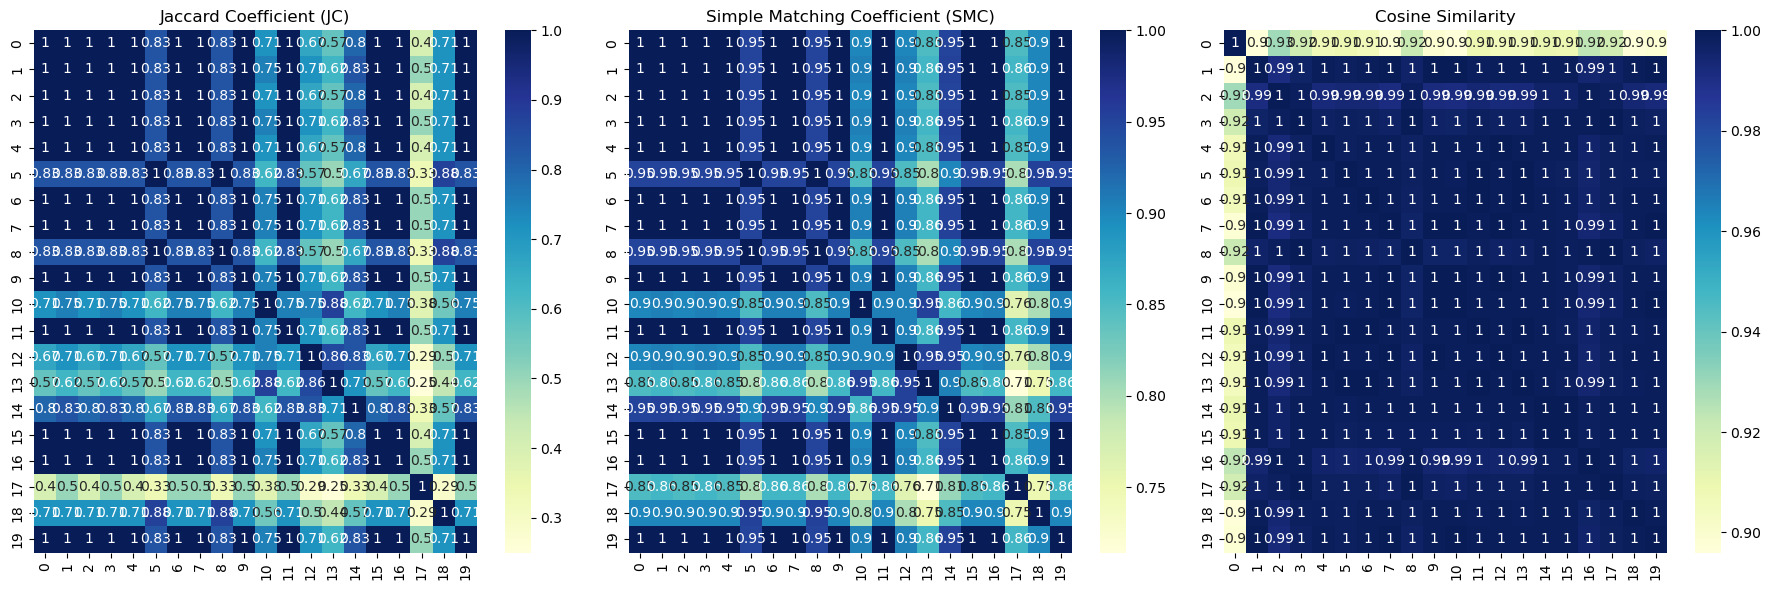

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the file
file_path = r'C:\Users\year3\Downloads\Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Convert all columns to numeric where possible, others remain as categorical
    df = preprocess_data(df)

    # Random sampling of 20 vectors
    sample_df = df.sample(n=20, random_state=42)

    # Initialize matrices for similarity measures
    n = sample_df.shape[0]
    jc_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))
    cosine_matrix = np.zeros((n, n))

    # Calculate similarity measures
    for i in range(n):
        for j in range(i, n):
            vector1 = sample_df.iloc[i].values
            vector2 = sample_df.iloc[j].values

            # Jaccard Coefficient (JC) for binary attributes
            binary_cols = (vector1 == 0) | (vector1 == 1)
            f11 = np.sum((vector1[binary_cols] == 1) & (vector2[binary_cols] == 1))
            f10 = np.sum((vector1[binary_cols] == 1) & (vector2[binary_cols] == 0))
            f01 = np.sum((vector1[binary_cols] == 0) & (vector2[binary_cols] == 1))
            jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else float('nan')
            jc_matrix[i, j] = jc
            jc_matrix[j, i] = jc

            # Simple Matching Coefficient (SMC) for binary attributes
            f00 = np.sum((vector1[binary_cols] == 0) & (vector2[binary_cols] == 0))
            smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else float('nan')
            smc_matrix[i, j] = smc
            smc_matrix[j, i] = smc

            # Cosine Similarity
            dot_product = np.dot(vector1, vector2)
            norm_vector1 = np.linalg.norm(vector1)
            norm_vector2 = np.linalg.norm(vector2)
            cosine_similarity = dot_product / (norm_vector1 * norm_vector2) if norm_vector1 > 0 and norm_vector2 > 0 else float('nan')
            cosine_matrix[i, j] = cosine_similarity
            cosine_matrix[j, i] = cosine_similarity

    # Plot heatmaps
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.heatmap(jc_matrix, annot=True, cmap='YlGnBu', ax=axes[0])
    axes[0].set_title('Jaccard Coefficient (JC)')

    sns.heatmap(smc_matrix, annot=True, cmap='YlGnBu', ax=axes[1])
    axes[1].set_title('Simple Matching Coefficient (SMC)')

    sns.heatmap(cosine_matrix, annot=True, cmap='YlGnBu', ax=axes[2])
    axes[2].set_title('Cosine Similarity')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")
